In [1]:
import tensorflow as tf
import keras as k

from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# chestii de keras de DL
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD, RMSprop, Adam
from keras.models import Sequential
from keras.utils import np_utils


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Magic numbers

In [2]:
reshaped = 28*28
nb_hidden_neurons_per_layer = 100
nb_classes = 10
# optim = SGD() # Stochastic Gradient Descent
# optim = RMSprop() # Stochastic Gradient Descent
optim = Adam() # Stochastic Gradient Descent
nb_batch_size = 128
nb_epochs = 20

In [3]:
print("calea catre minist: ", mnist.__file__)
#print("calea catre Dense: ", Dense.__file__)

# ca sa avem aceleasi rezultate, ii dam un sid
np.random.seed(42)

('calea catre minist: ', '/usr/local/lib/python2.7/dist-packages/keras/datasets/mnist.pyc')


# Import the dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Analyse the data

In [5]:
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape", x_test.shape)
print("y_test.shape", y_test.shape)

('x_train.shape: ', (60000, 28, 28))
('y_train.shape: ', (60000,))
('x_test.shape', (10000, 28, 28))
('y_test.shape', (10000,))


# Plot some data

('label: ', 9)


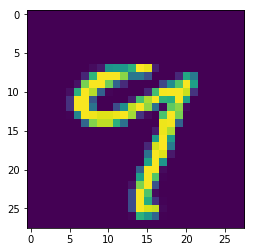

In [6]:
index = 154
plt.imshow(x_train[index])
print("label: ", y_train[index])

In [7]:
print("min pixelilor: ", np.min(x_train))
print("max pixelilor: ", np.max(x_train))

('min pixelilor: ', 0)
('max pixelilor: ', 255)


# Unroll the vectors

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], reshaped))
x_test = np.reshape(x_test, (x_test.shape[0], reshaped))
print("x_train.shape: ", x_train.shape)
print("x_test.shape", x_test.shape)
# print("x_test.shape", len(x_test[1]))
print(type(x_test))

('x_train.shape: ', (60000, 784))
('x_test.shape', (10000, 784))
<type 'numpy.ndarray'>


# Ensure Float and Normalize

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(type(x_test))

<type 'numpy.ndarray'>


# One-hot enoding

In [10]:
index = 12
# plt.imshow(x_train[index])
print("label: ", y_train[index])

('label: ', 3)


In [11]:
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [12]:
print("label: ", y_train[index])
print("type(y_train): ", type(y_train))
print("min pixelilor: ", np.min(x_train))
print("max pixelilor: ", np.max(x_train))


('label: ', array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]))
('type(y_train): ', <type 'numpy.ndarray'>)
('min pixelilor: ', 0.0)
('max pixelilor: ', 1.0)


# Create a Neural Network

In [13]:
model = Sequential()

model.add(Dense(nb_hidden_neurons_per_layer, input_shape=(reshaped,)))
model.add(Dense(nb_hidden_neurons_per_layer))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# get some info
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [14]:
model.compile(loss='categorical_crossentropy', 
              optimizer=optim, 
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=nb_batch_size, 
                    epochs=nb_epochs, 
                    verbose=1, 
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 46us/step - loss: 0.4093 - acc: 0.8814 - val_loss: 0.2914 - val_acc: 0.9197
Epoch 2/20
48000/48000 [==============================] - 2s 46us/step - loss: 0.3031 - acc: 0.9137 - val_loss: 0.2814 - val_acc: 0.9233
Epoch 3/20
48000/48000 [==============================] - 2s 42us/step - loss: 0.2888 - acc: 0.9192 - val_loss: 0.2949 - val_acc: 0.9167
Epoch 4/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.2848 - acc: 0.9203 - val_loss: 0.2757 - val_acc: 0.9251
Epoch 5/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.2783 - acc: 0.9210 - val_loss: 0.2828 - val_acc: 0.9226
Epoch 6/20
48000/48000 [==============================] - 2s 35us/step - loss: 0.2734 - acc: 0.9230 - val_loss: 0.2803 - val_acc: 0.9218
Epoch 7/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.2713 - acc: 0.9242 - val_loss: 0.2774 - val_acc

# Predictions on the test data

In [16]:
score = model.evaluate(x_test, y_test, batch_size=nb_batch_size)

10000/10000 [==============================] - 0s 17us/step


# Get the accuracy

In [17]:
print("score: ", score[0])
print("accuracy: ", score[1])


('score: ', 0.2945993344187737)
('accuracy: ', 0.9222)


# Find examples where the algorithm failed

In [19]:
# y_test => realitatea
# y_predicted => , trebuie compara
y_pred = model.predict(x_test)

In [20]:
y_pred[0]

array([1.9201224e-07, 3.2869127e-14, 2.1480062e-07, 3.9632872e-04,
       3.7358340e-08, 1.7995914e-06, 7.4410188e-13, 9.9952626e-01,
       1.0031846e-06, 7.4183190e-05], dtype=float32)

In [21]:
p = np.max(y_pred[0])

In [22]:
p

0.99952626

In [23]:
y_pred[0]

array([1.9201224e-07, 3.2869127e-14, 2.1480062e-07, 3.9632872e-04,
       3.7358340e-08, 1.7995914e-06, 7.4410188e-13, 9.9952626e-01,
       1.0031846e-06, 7.4183190e-05], dtype=float32)

('x_test_prim.shape: ', (784,))
('Real label: ', array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]))


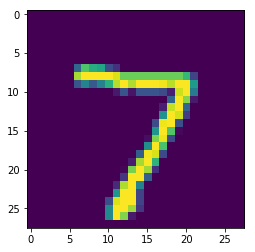

In [28]:
# plot
x_test_prim = x_test[0]
print("x_test_prim.shape: ", x_test_prim.shape)
x_test_prim = np.reshape(x_test_prim, (28,28))
plt.imshow(x_test_prim)
print("Real label: ", y_test[0])


In [30]:
pred_prim = model.predict_classes(x_test_prim)

ValueError: Error when checking : expected dense_1_input to have shape (784,) but got array with shape (28,)